# Task 1 - Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report , f1_score , confusion_matrix , accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('data/Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.shape

(600, 6)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label = LabelEncoder()

In [10]:
df['Undergrad'] = label.fit_transform(df['Undergrad'])
df['Urban'] = label.fit_transform(df['Urban'])
df = pd.get_dummies(df, columns = ['Marital.Status'], drop_first= True)

In [11]:
df.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,1,0,1
1,1,33700,134075,18,1,0,0
2,0,36925,160205,30,1,1,0
3,1,50190,193264,15,1,0,1
4,0,81002,27533,28,0,1,0


In [12]:
df['Taxable.Income']

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [13]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [14]:
df[df['Taxable.Income'] >= 30000]

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single,TaxInc
0,0,68833,50047,10,1,0,1,Good
1,1,33700,134075,18,1,0,0,Good
2,0,36925,160205,30,1,1,0,Good
3,1,50190,193264,15,1,0,1,Good
4,0,81002,27533,28,0,1,0,Good
...,...,...,...,...,...,...,...,...
595,1,76340,39492,7,1,0,0,Good
596,1,69967,55369,2,1,0,0,Good
597,0,47334,154058,0,1,0,0,Good
598,1,98592,180083,17,0,1,0,Good


In [15]:
df[df['Taxable.Income'] < 30000]

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single,TaxInc
10,0,29732,102602,19,1,0,1,Risky
12,0,11794,148033,14,1,0,0,Risky
16,1,24987,34551,29,0,0,0,Risky
19,0,10987,126953,30,1,0,1,Risky
21,1,14310,29106,7,1,0,0,Risky
...,...,...,...,...,...,...,...,...
544,0,29916,133877,21,1,0,1,Risky
557,1,12810,157421,10,0,1,0,Risky
567,1,16316,129912,30,0,0,1,Risky
575,0,10735,95975,13,1,0,0,Risky


In [16]:
df['TaxInc'] = label.fit_transform(df['TaxInc'])

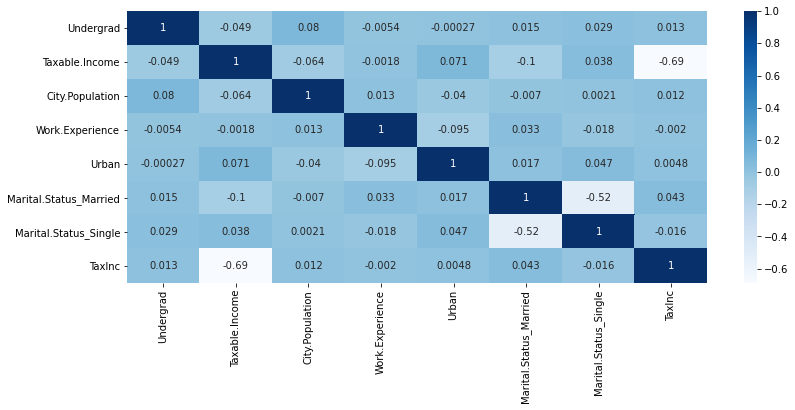

In [17]:
plt.figure(figsize = (13,5))
sns.heatmap(df.corr() , cmap = 'Blues' , annot = True)

In [18]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [19]:
df_norm = norm_func(df.iloc[:,:])
df_norm.tail(10)

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single,TaxInc
590,0.0,0.368405,0.341473,0.466667,1.0,1.0,0.0,0.0
591,1.0,0.194061,0.615406,0.600000,1.0,0.0,1.0,1.0
592,1.0,0.648869,0.283703,0.533333,0.0,0.0,1.0,0.0
593,0.0,0.834360,0.610256,0.333333,1.0,0.0,0.0,0.0
594,0.0,0.416901,0.412341,0.300000,1.0,1.0,0.0,0.0
595,1.0,0.740236,0.078811,0.233333,1.0,0.0,0.0,0.0
596,1.0,0.669122,0.170058,0.066667,1.0,0.0,0.0,0.0
597,0.0,0.416566,0.737240,0.000000,1.0,0.0,0.0,0.0
598,1.0,0.988540,0.886810,0.566667,0.0,1.0,0.0,0.0
599,0.0,0.965408,0.760683,0.533333,0.0,0.0,0.0,0.0


In [20]:
# Separating target column
x = df_norm.iloc[: , :-1]
y = df_norm.iloc[:, -1]

In [21]:
# Splitting into training and testing data
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.20 , random_state= 42)
print(x_train.shape , '\n', x_test.shape ,'\n' , y_train.shape , '\n' ,y_test.shape)

(480, 7) 
 (120, 7) 
 (480,) 
 (120,)


## Finding best parameters for Decision tree model using Grid Search

In [22]:
model = DecisionTreeClassifier()
criterion = ['entropy' , 'gini']
max_depth = [6,4,8,10,12]
parameters = {'criterion': criterion , 'max_depth': max_depth}
clf_GS = GridSearchCV(estimator = model, param_grid=parameters)
clf_GS.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [6, 4, 8, 10, 12]})

In [23]:
clf_GS.best_params_

{'criterion': 'entropy', 'max_depth': 6}

## Decision tree model using criteria = entropy and max depth = 6

In [24]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

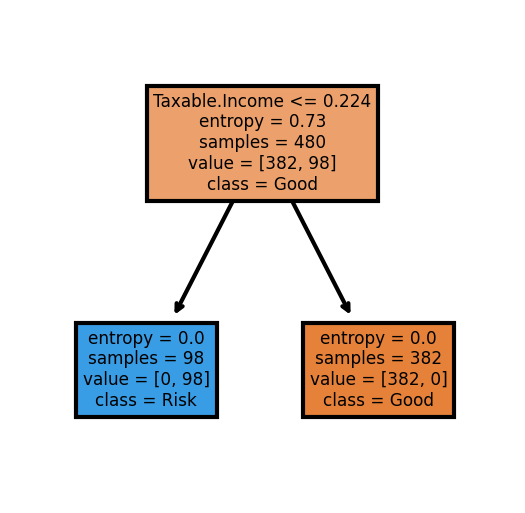

In [25]:
fn= df.columns
cn=['Good', 'Risk']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [26]:
# Predicting on training data
y_pred = model.predict(x_train)
print('Predicted value counts: \n',pd.Series(y_pred).value_counts())
print('-'*50)
print('Crosstab: \n',pd.crosstab(y_train,y_pred))
print('-'*50)
print('Classification Report: \n', classification_report(y_train , y_pred))
print('-'*50)
print('Confusion Matrix: \n', confusion_matrix(y_train , y_pred))
print('-'*50)      
print('Accuracy Score = ',accuracy_score(y_train , y_pred))

Predicted value counts: 
 0.0    382
1.0     98
dtype: int64
--------------------------------------------------
Crosstab: 
 col_0   0.0  1.0
TaxInc          
0.0     382    0
1.0       0   98
--------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       382
         1.0       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

--------------------------------------------------
Confusion Matrix: 
 [[382   0]
 [  0  98]]
--------------------------------------------------
Accuracy Score =  1.0


In [28]:
# Predicting on training data
y_pred = model.predict(x_test)
print('Predicted value counts: \n',pd.Series(y_pred).value_counts())
print('-'*50)
print('Crosstab: \n',pd.crosstab(y_test,y_pred))
print('-'*50)
print('Classification Report: \n', classification_report(y_test , y_pred))
print('-'*50)
print('Confusion Matrix: \n', confusion_matrix(y_test , y_pred))
print('-'*50) 
print('Accuracy Score = ',accuracy_score(y_test , y_pred))

Predicted value counts: 
 0.0    94
1.0    26
dtype: int64
--------------------------------------------------
Crosstab: 
 col_0   0.0  1.0
TaxInc          
0.0      94    0
1.0       0   26
--------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        94
         1.0       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

--------------------------------------------------
Confusion Matrix: 
 [[94  0]
 [ 0 26]]
--------------------------------------------------
Accuracy Score =  1.0


### Training and Testing accuracy is 1. This is because we have created a custom condition that whenever Taxable Income >= 30000 , the outcome will be True. Hence , the entropy is highest in the Taxable Income attribute. Therefore , the predictions can be made solely on the basis of Taxable Income which makes the accuracy = 1